In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe()
print(titanic.dtypes)
print(titanic.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


In [4]:
missing_data = titanic.isnull().sum() #best way to find missing values


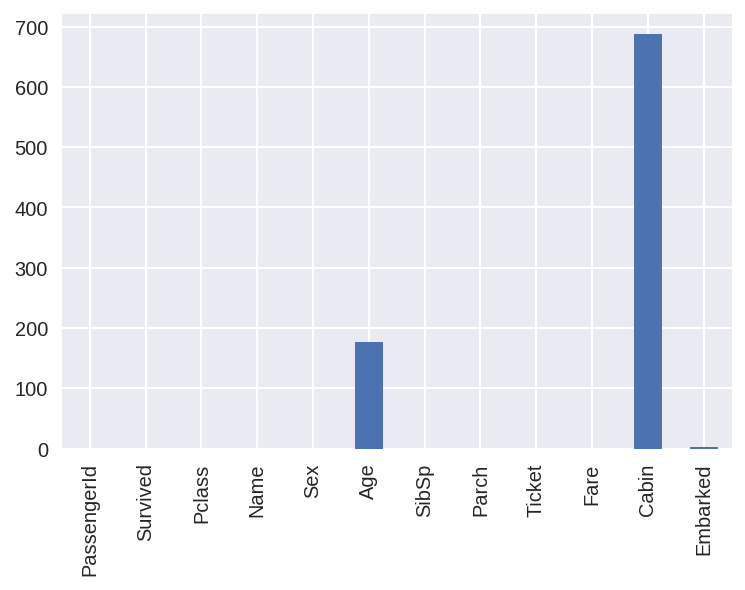

In [5]:
missing_data.plot(kind = 'bar')

In [6]:
missing_cabin = titanic['Cabin'].isnull()
titanic.loc[missing_cabin] 
titanic.head()

filler = "¯\(ツ)/¯"

titanic.loc[titanic["Cabin"].isnull(), 'Cabin'] = filler
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [7]:
missing_age = titanic['Age'].isnull()
titanic.loc[missing_age, :]
type(missing_age)

pandas.core.series.Series

In [8]:
missing_embarked = titanic['Embarked'].isnull()
titanic.loc[missing_embarked, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
titanic.shape

(891, 12)

In [10]:
titanic.loc[missing_embarked, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [12]:
titanic = titanic.drop([61, 829])

In [13]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

In [14]:
def is_reverend(value):
    strings = value.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0



In [15]:
titanic['IsReverend'] = titanic['Name'].apply(is_reverend)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [17]:
titanic = pd.get_dummies(titanic, columns=['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [18]:
survival = titanic.groupby("Survived")
survival.groups


{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=340)}

In [19]:
number_survivors = titanic[titanic.columns[1]].sum()
print('The total number of survivors was: {}'.format(number_survivors))

The total number of survivors was: 340


In [20]:
#What was the survival rate overall?

survival_rate = titanic[titanic.columns[1]].sum() / len(titanic['Survived']) * 100
survival_rate

print('The overall survival rate was: {0}%'.format(survival_rate))

The overall survival rate was: 38.24521934758155%


In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [22]:
male_mask = [gender == "male" for gender in titanic.Sex]
female_mask = [gender == 'female' for gender in titanic.Sex]


male_survival = [survived for index, survived in enumerate(titanic.Survived) if male_mask[index]]
male_survival = np.array([male_survival])
male_survival.sum()
print('Total male survivors were: {}'.format(male_survival.sum()))

Total male survivors were: 109


In [23]:
female_survival = [survived for index, survived in enumerate(titanic.Survived) if female_mask[index]]
female_survival = np.array([female_survival])
female_survival.sum()
print('Total female survivors were: {}'.format(female_survival.sum()))

Total female survivors were: 231


In [24]:
male_count = np.array([male_mask])
female_count = np.array([female_mask])

In [25]:
male_survival_rate = (male_survival.sum() / male_count.sum() * 100 )
female_survival_rate = (female_survival.sum() / female_count.sum() * 100)

In [26]:
print('The overall male survival rate was: {}%'.format(male_survival_rate))

The overall male survival rate was: 18.890814558058924%


In [27]:
print('The overall female survival rate was: {}%'.format(female_survival_rate))

The overall female survival rate was: 74.03846153846155%


In [28]:
#What was the survival rate for each Pclass?

titanic.head()

p_1_mask = [passenger == 1 for passenger in titanic.Pclass]
p_2_mask = [passenger == 2 for passenger in titanic.Pclass]
p_3_mask = [passenger == 3 for passenger in titanic.Pclass]


p_1_survival = [survived for index, survived in enumerate(titanic.Survived) if p_1_mask[index]]
p_1_survival = np.array([p_1_survival])
p_1_survival_rate = (p_1_survival.sum() / number_survivors.sum()*100)
p_1_survival_rate
print('PClass 1 survival rate was: {}%'.format(p_1_survival_rate))

PClass 1 survival rate was: 39.411764705882355%


In [29]:
p_2_survival = [survived for index, survived in enumerate(titanic.Survived) if p_2_mask[index]]
p_2_survival = np.array([p_2_survival])
p_2_survival_rate = (p_2_survival.sum() / number_survivors.sum()*100)
p_2_survival_rate
print('PClass 2 survival rate was: {}%'.format(p_2_survival_rate))

PClass 2 survival rate was: 25.588235294117645%


In [30]:
p_3_survival = [survived for index, survived in enumerate(titanic.Survived) if p_3_mask[index]]
p_3_survival = np.array([p_3_survival])
p_3_survival_rate = (p_3_survival.sum() / number_survivors.sum() *100)
p_3_survival_rate
print('PClass 3 survival rate was: {}%'.format(p_3_survival_rate))

PClass 3 survival rate was: 35.0%


In [31]:
classes_survived = titanic.groupby(['Pclass'])['Survived']
classes_survived.groups

{1: Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
             ...
             853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
            dtype='int64', length=214),
 2: Int64Index([  9,  15,  17,  20,  21,  33,  41,  43,  53,  56,
             ...
             848, 854, 861, 864, 865, 866, 874, 880, 883, 886],
            dtype='int64', length=184),
 3: Int64Index([  0,   2,   4,   5,   7,   8,  10,  12,  13,  14,
             ...
             875, 876, 877, 878, 881, 882, 884, 885, 888, 890],
            dtype='int64', length=491)}

In [32]:
titanic.head()
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\(ツ)/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\(ツ)/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,0,0,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\(ツ)/¯,0,0,0,1,0


In [33]:
# Did any reverends survive? How many?

reverend_mask = [survival == 1 for gender in titanic.IsReverend]
reverend_mask = np.array([reverend_mask])
reverend_mask.sum()
print("No Reverends made it off the Titanic.")

No Reverends made it off the Titanic.


In [34]:
# What is the survival rate for cabins marked ¯\(ツ)/¯

survival_rate_by_cabin = titanic.groupby('Cabin')['Survived'].sum()/titanic.groupby('Cabin')['PassengerId'].count() * 100
survival_rate_by_cabin.filter(items=['¯\(ツ)/¯'])


Cabin
¯\(ツ)/¯    29.985444
dtype: float64

In [35]:
#What is the survival rate for people whose Age is empty

age_mask = [pd.isnull(x) for x in titanic.Age]
age_survival = [age for index, age in enumerate(titanic.Survived) if age_mask[index]]
age_survival = np.array([age_survival])
age_survival_rate = (age_survival.sum() / number_survivors.sum() * 100)
print('Empty Age category survival rate was: {}%'.format(age_survival_rate))

Empty Age category survival rate was: 15.294117647058824%


In [36]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


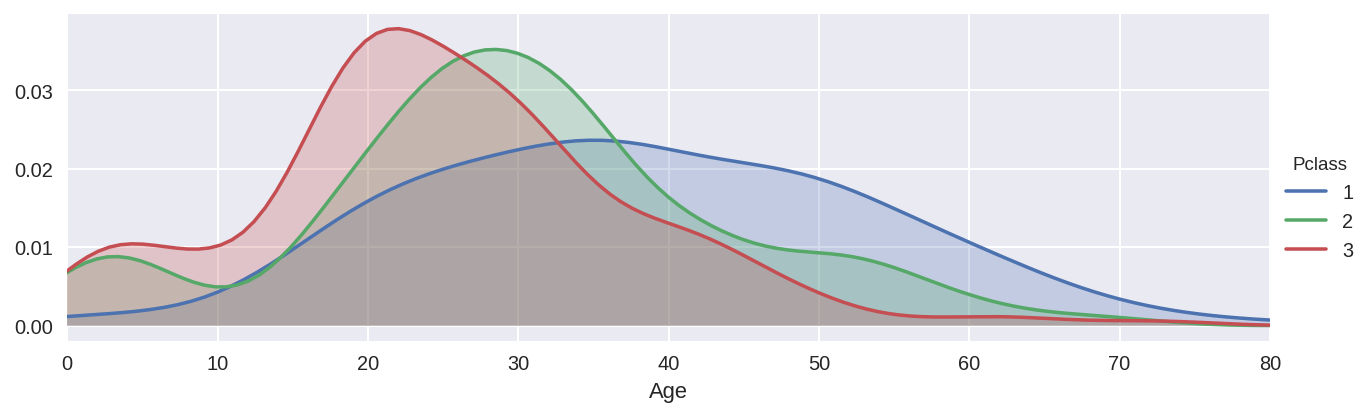

In [37]:
#graph looking at the distribution of age across each Pclass
age_class = sns.FacetGrid(titanic, hue='Pclass', aspect=3, legend_out=True)
age_class.map(sns.kdeplot, "Age", shade=True).add_legend()
age_class.set(xlim=(0, 80))

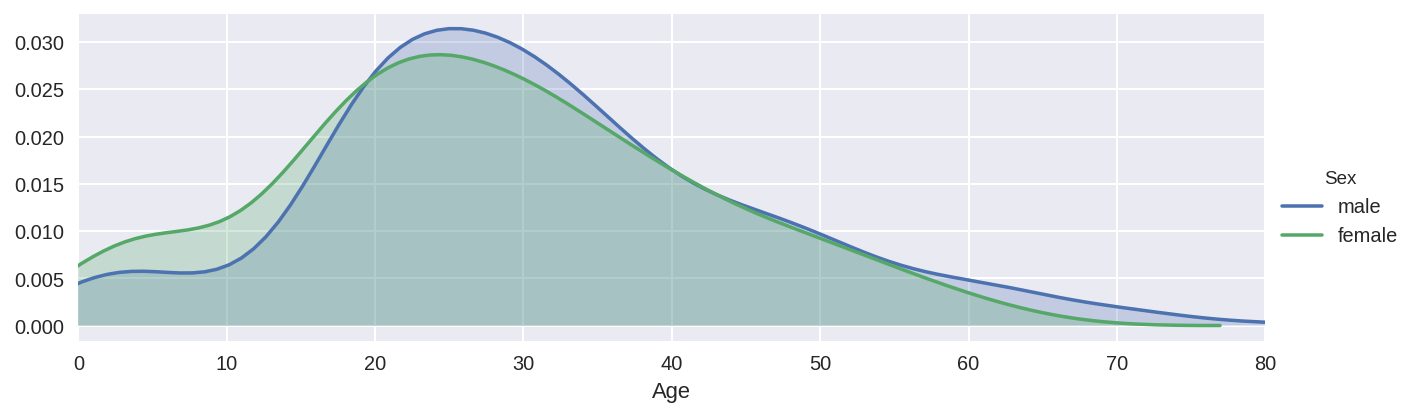

In [38]:
#graph looking at the distribution of age 

age_sex = sns.FacetGrid(titanic, hue="Sex", aspect=3)
age_sex.map(sns.kdeplot, "Age", shade=True).add_legend()
age_sex.set(xlim=(0, 80));

In [39]:
#What is the survival rate for each port of embarkation?


c_mask = [passenger == 1 for passenger in titanic.Embarked_C]
q_mask = [passenger == 1 for passenger in titanic.Embarked_Q]
s_mask = [passenger == 1 for passenger in titanic.Embarked_S]

c_survival = [c for index, c in enumerate(titanic.Survived) if c_mask[index]]
c_survival = np.array([c_survival])
c_survival_rate = (c_survival.sum() / number_survivors.sum()*100)
print('The survival rate for embarking from Cherbourg was: {}%'.format(c_survival_rate))

The survival rate for embarking from Cherbourg was: 27.35294117647059%


In [40]:
q_survival = [q for index, q in enumerate(titanic.Survived) if q_mask[index]]
q_survival = np.array([q_survival])
q_survival_rate = (q_survival.sum() / number_survivors.sum() * 100)
q_survival_rate
print('The survival rate for embarking from Queenstown was: {}%'.format(q_survival_rate))

The survival rate for embarking from Queenstown was: 8.823529411764707%


In [41]:
s_survival = [s for index, s in enumerate(titanic.Survived) if s_mask[index]]
s_survival = np.array([s_survival])
s_survival_rate = (s_survival.sum() / number_survivors.sum() * 100)
s_survival_rate
print('The survival rate for embarking from Southampton was: {}%'.format(s_survival_rate))

The survival rate for embarking from Southampton was: 63.8235294117647%


In [42]:
#creating another class variable for use later on. 
titanic["Class"] = titanic.Pclass.map({1: "First", 2: "Second", 3: "Third"})

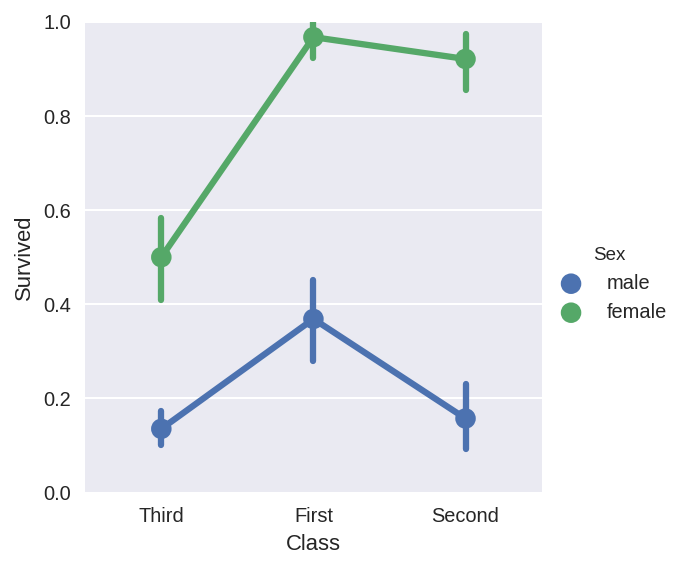

In [43]:
#survival rate of gender by class 

sns.factorplot("Class", "Survived", data=titanic, hue="Sex").set(ylim=(0,1))

In [44]:
# What is the survival rate for children (under 12) in each Pclass
#Lets go ahead and filter then group by
titanic_u12 = titanic[titanic['Age'] < 12]
survival_rate_by_PClass_u12 = titanic_u12.groupby('Pclass')['Survived'].sum()/titanic_u12.groupby('Pclass')['PassengerId'].count() * 100
survival_rate_by_PClass_u12

Pclass
1     75.000000
2    100.000000
3     40.425532
dtype: float64

In [45]:
#defining a man, woman and child variable

def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 12:
        return "Child"
    else:
        return dict(male="Man", female="Woman")[sex]
    
titanic["Who"] = titanic[["Age", "Sex"]].apply(woman_child_or_man, axis=1)

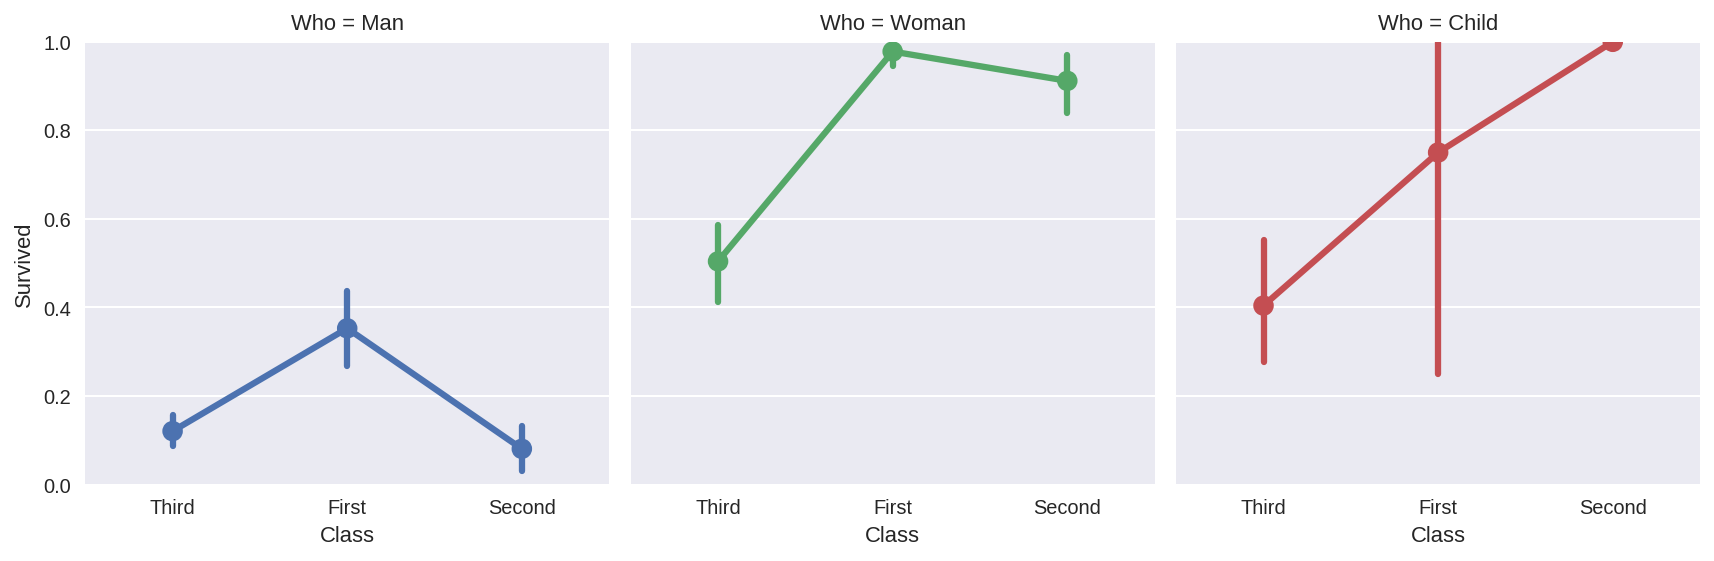

In [46]:
#effect of the women and children first policy

m_w_c = sns.factorplot("Class", "Survived", data=titanic, hue="Who", col="Who", aspect=1)
m_w_c.set(ylim=(0, 1))
m_w_c.despine(left=True)

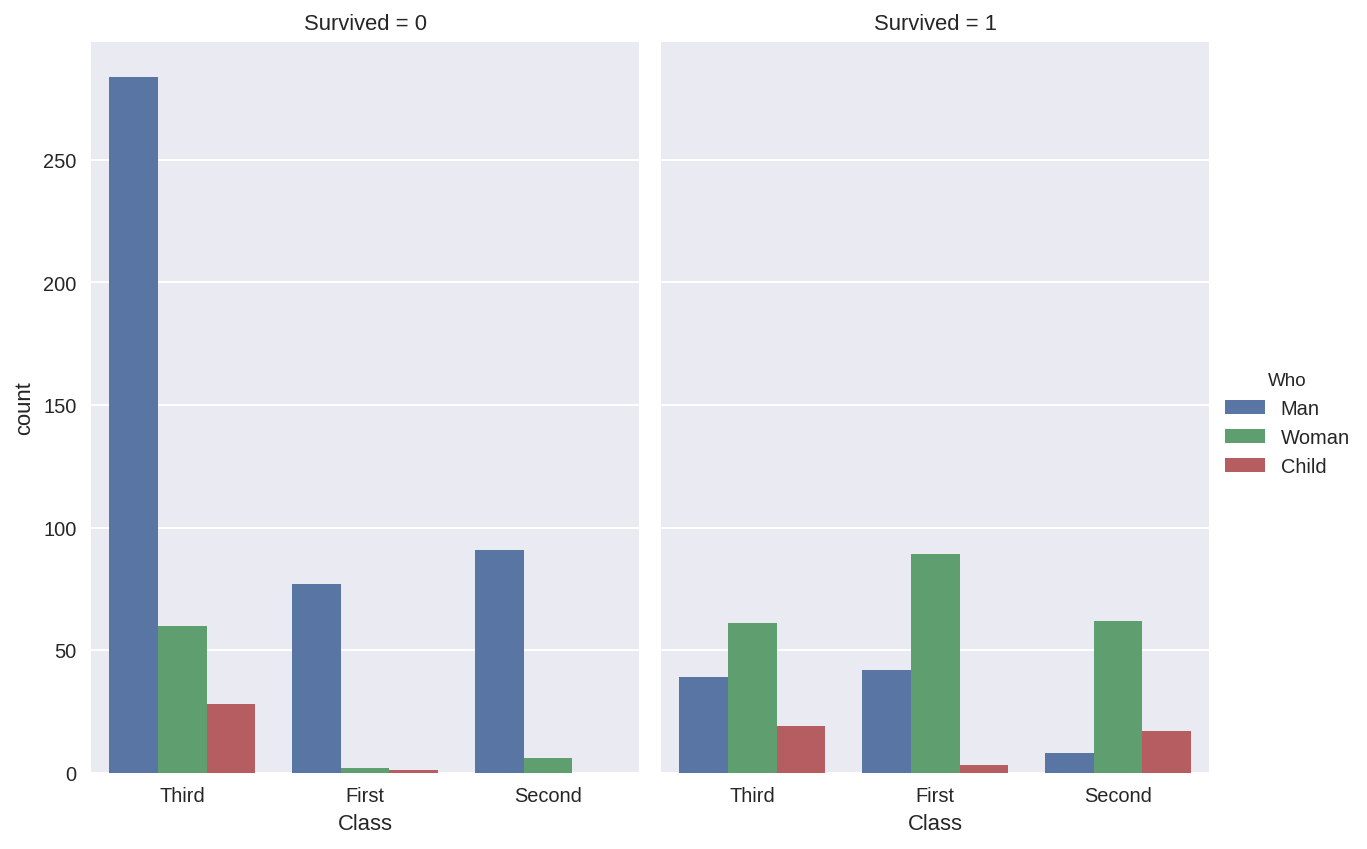

In [47]:
# Counts of men women and children who survived

sns.factorplot(x="Class", hue="Who", col="Survived", data=titanic, kind="count",size=6, aspect=.7)

In [48]:
#Did the captain of the ship survive? Is he on the list? #Edward John Smith #No, he died and was not on the list.
def captainondeck(value):
    strings = value.split()
    if 'Smith' in str(strings):
        return 1
    else:
        return 0

titanic['IsCapt'] = titanic['Name'].map(captainondeck)
titanic[titanic['IsCapt'] == 1]

print("It appears that Captain Edward John Smith was not in the list, he went down with the ship, per the Titanic Movie")

It appears that Captain Edward John Smith was not in the list, he went down with the ship, per the Titanic Movie


In [49]:
#Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic.head()
spendy_ticket = titanic.sort_values(by=['Fare', 'Survived'], ascending=False)
spendy_ticket.head(7)
print('The person who did not survive and paid the most was Mr. Charles Alexander Fortune, who turns out was not that \n fortunate.')

The person who did not survive and paid the most was Mr. Charles Alexander Fortune, who turns out was not that 
 fortunate.


In [50]:
#Does having family on the boat help or hurt your chances of survival?

fam = titanic.sort_values(by='FamilyCount', ascending=False)
fam.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Class,Who,IsCapt
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Man,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Woman,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Man,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Man,0
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Woman,0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Man,0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,¯\(ツ)/¯,10,0,0,0,1,Third,Woman,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,¯\(ツ)/¯,7,0,0,0,1,Third,Child,0
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,¯\(ツ)/¯,7,0,0,0,1,Third,Man,0
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,¯\(ツ)/¯,7,0,0,0,1,Third,Child,0


In [51]:
titanic_family = titanic[titanic['FamilyCount'] >= 1]
survival_rate_by_family = titanic.groupby('FamilyCount')['Survived'].sum()/titanic_family.groupby('FamilyCount')['PassengerId'].count() * 100
survival_rate_by_family


FamilyCount
0           NaN
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

In [52]:
titanic_no_family = titanic[titanic['FamilyCount'] < 1]
survival_rate_by_no_family = titanic_no_family.groupby('FamilyCount')['Survived'].sum()/titanic_no_family.groupby('FamilyCount')['PassengerId'].count() * 100
survival_rate_by_no_family

FamilyCount
0    30.093458
dtype: float64

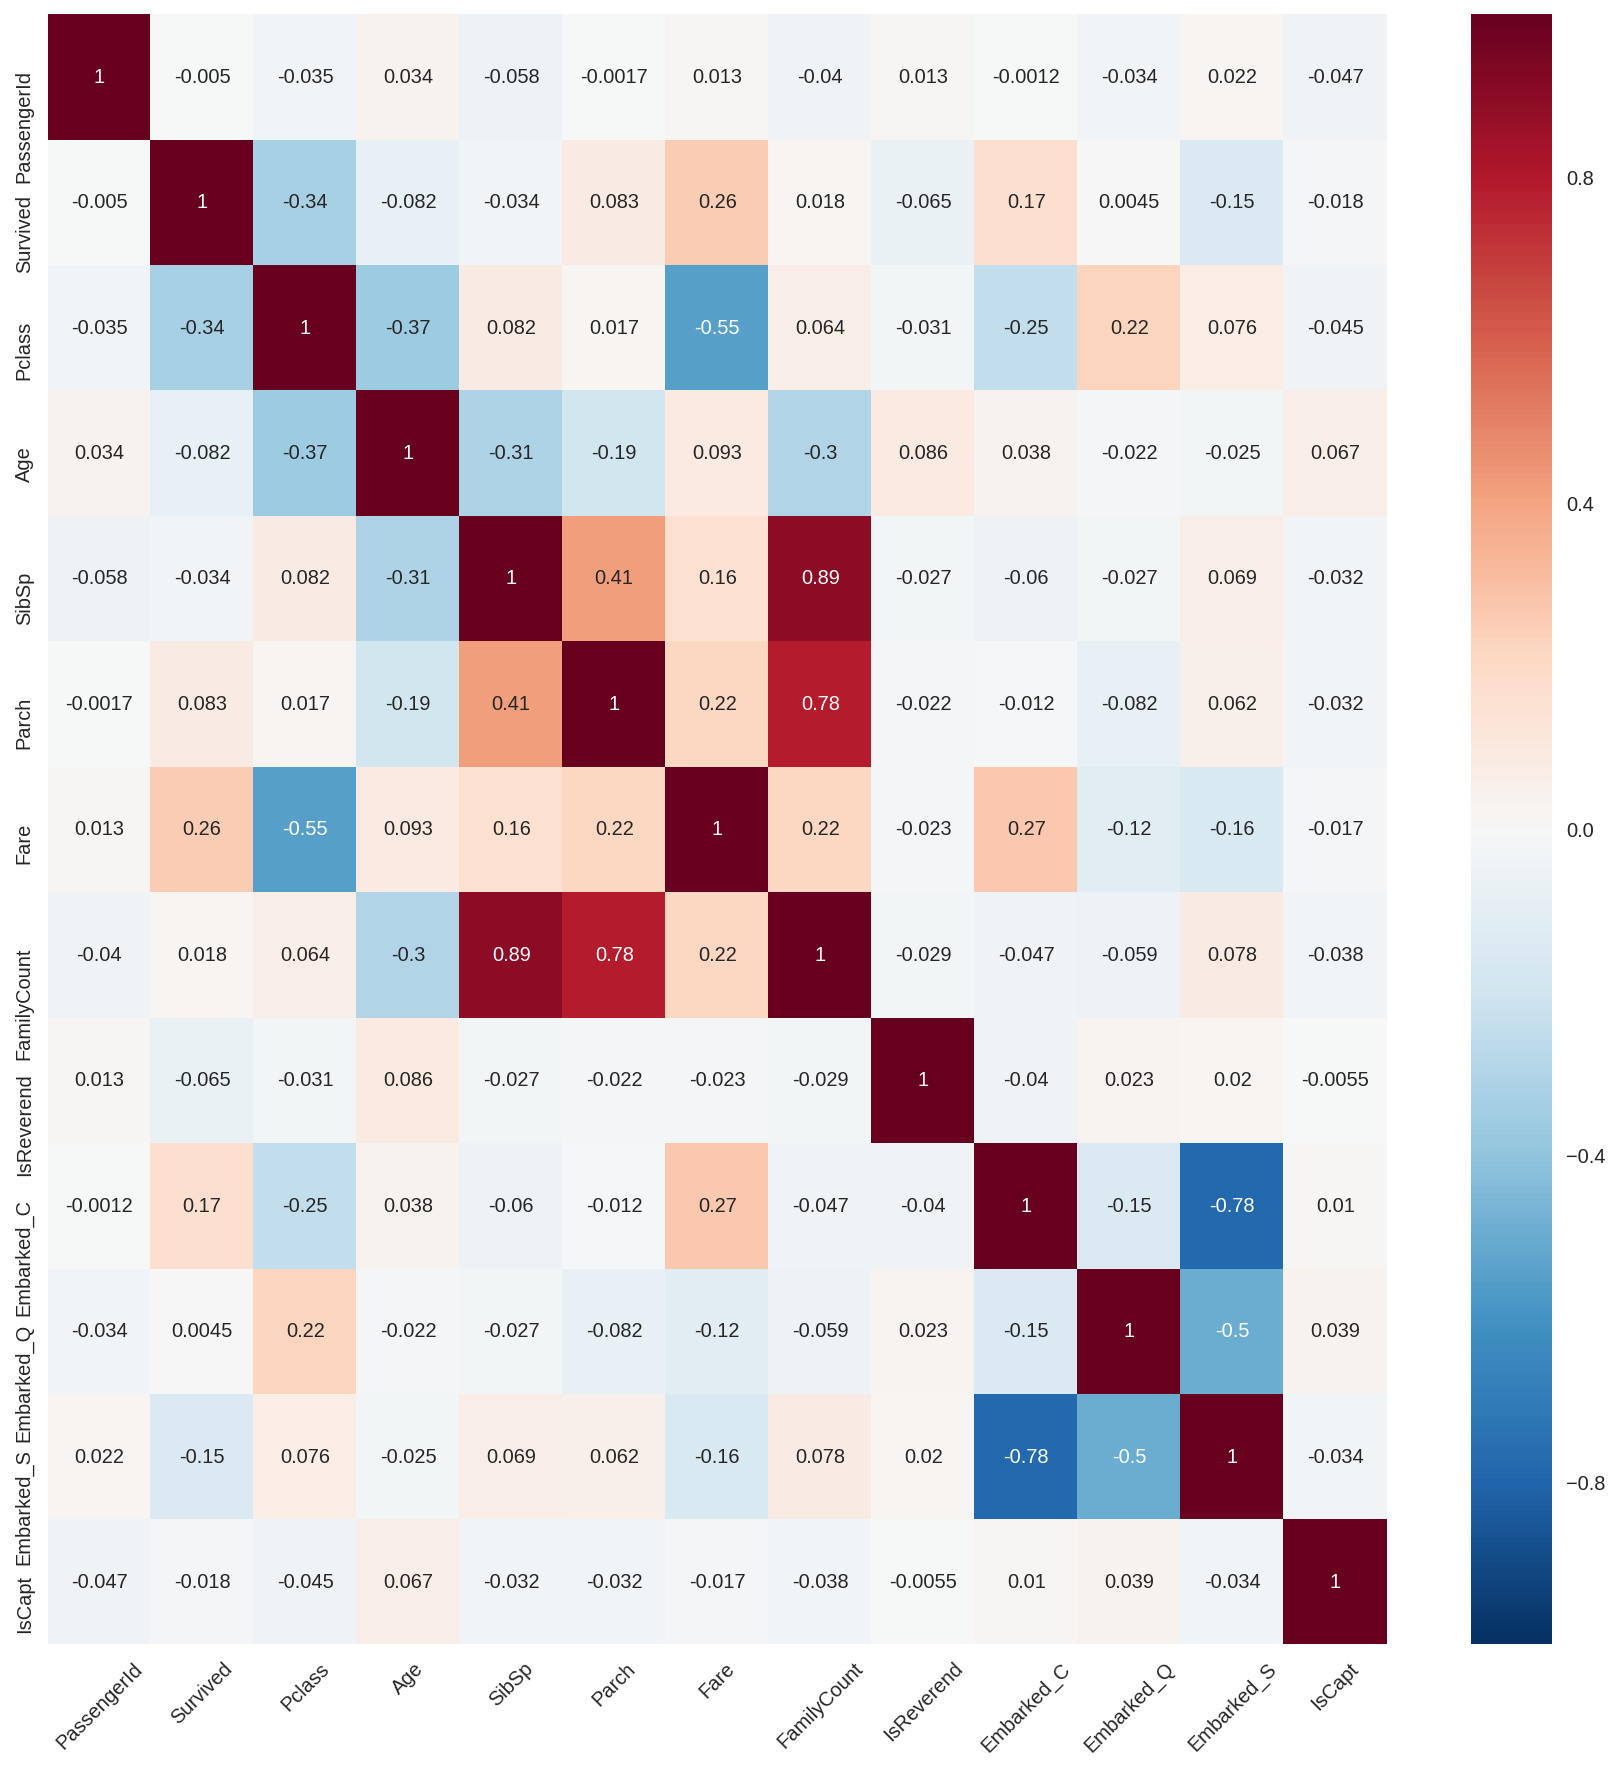

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
plt.xticks(rotation = 45)
sns.heatmap(titanic.corr(), annot = True)

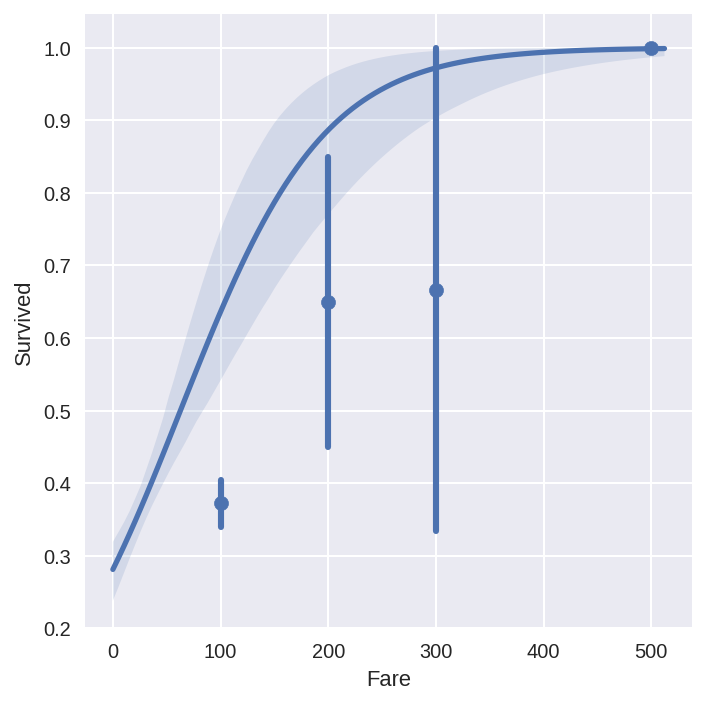

In [54]:
#regression of fare of the change of survival 
tiers = [100,200,300,400,500]
sns.lmplot("Fare", "Survived", titanic, logistic=True, x_bins=tiers, truncate=True)

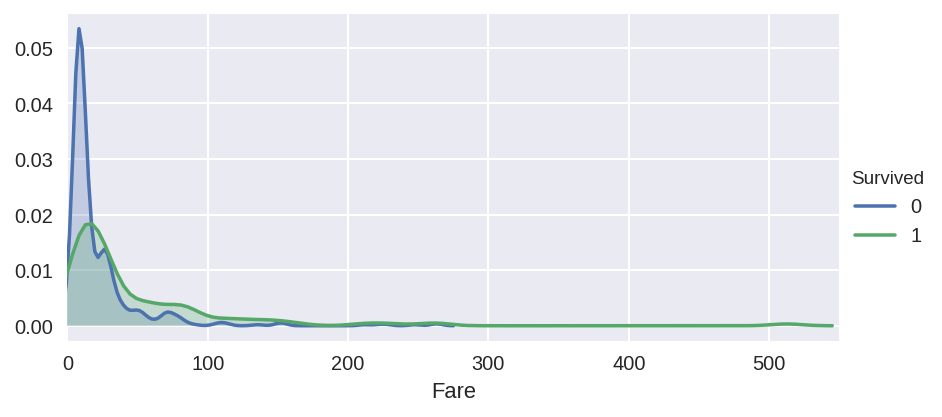

In [55]:

fare_to_survival = sns.FacetGrid(titanic, hue="Survived", aspect=2)
fare_to_survival.map(sns.kdeplot, "Fare", shade=True).add_legend()
fare_to_survival.set(xlim=(0, 550));

Survived      0                                                            1  \
          count       mean        std  min     25%   50%   75%    max  count   
Fare      549.0  22.117887  31.388207  0.0  7.8542  10.5  26.0  263.0  340.0   

Survived                                                                
               mean        std  min       25%   50%      75%       max  
Fare      48.209498  66.748773  0.0  12.44375  26.0  56.9469  512.3292

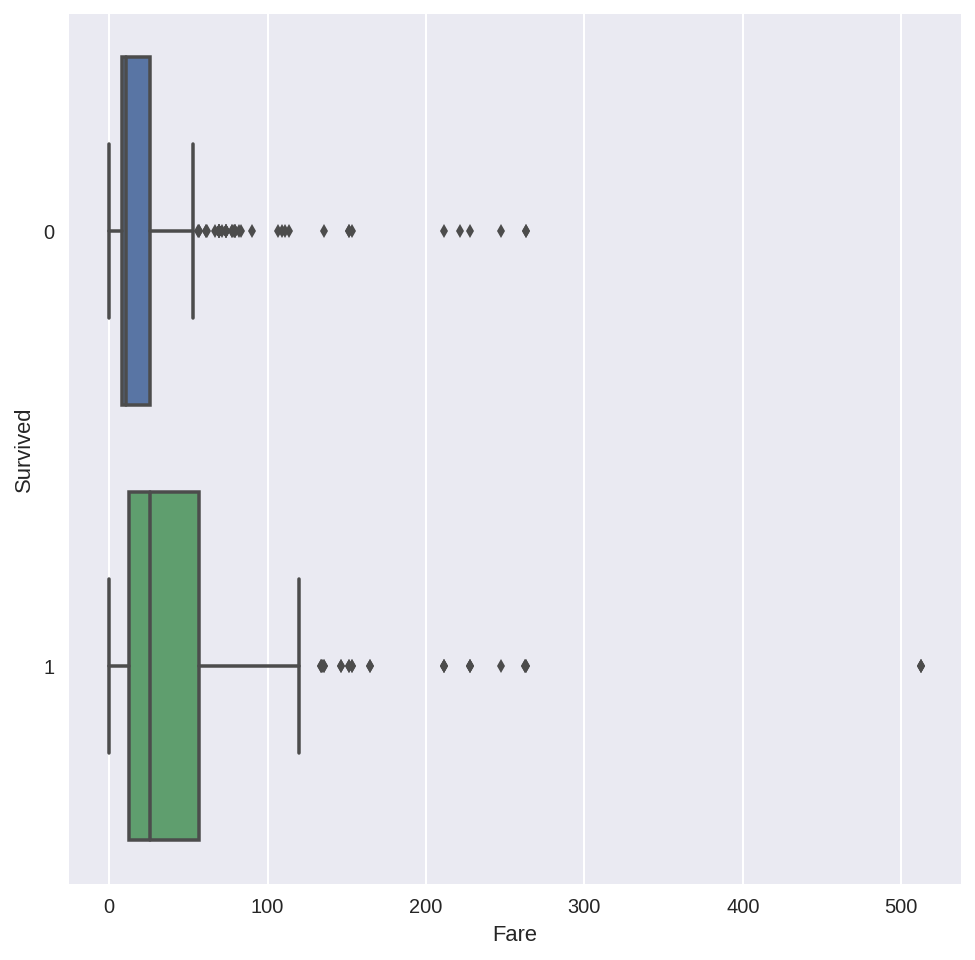

In [56]:
fig=plt.figure(figsize=(8,8))
sns.boxplot(x="Fare", y="Survived", data=titanic, orient='h')
titanic.groupby("Survived")[["Fare"]].describe().T

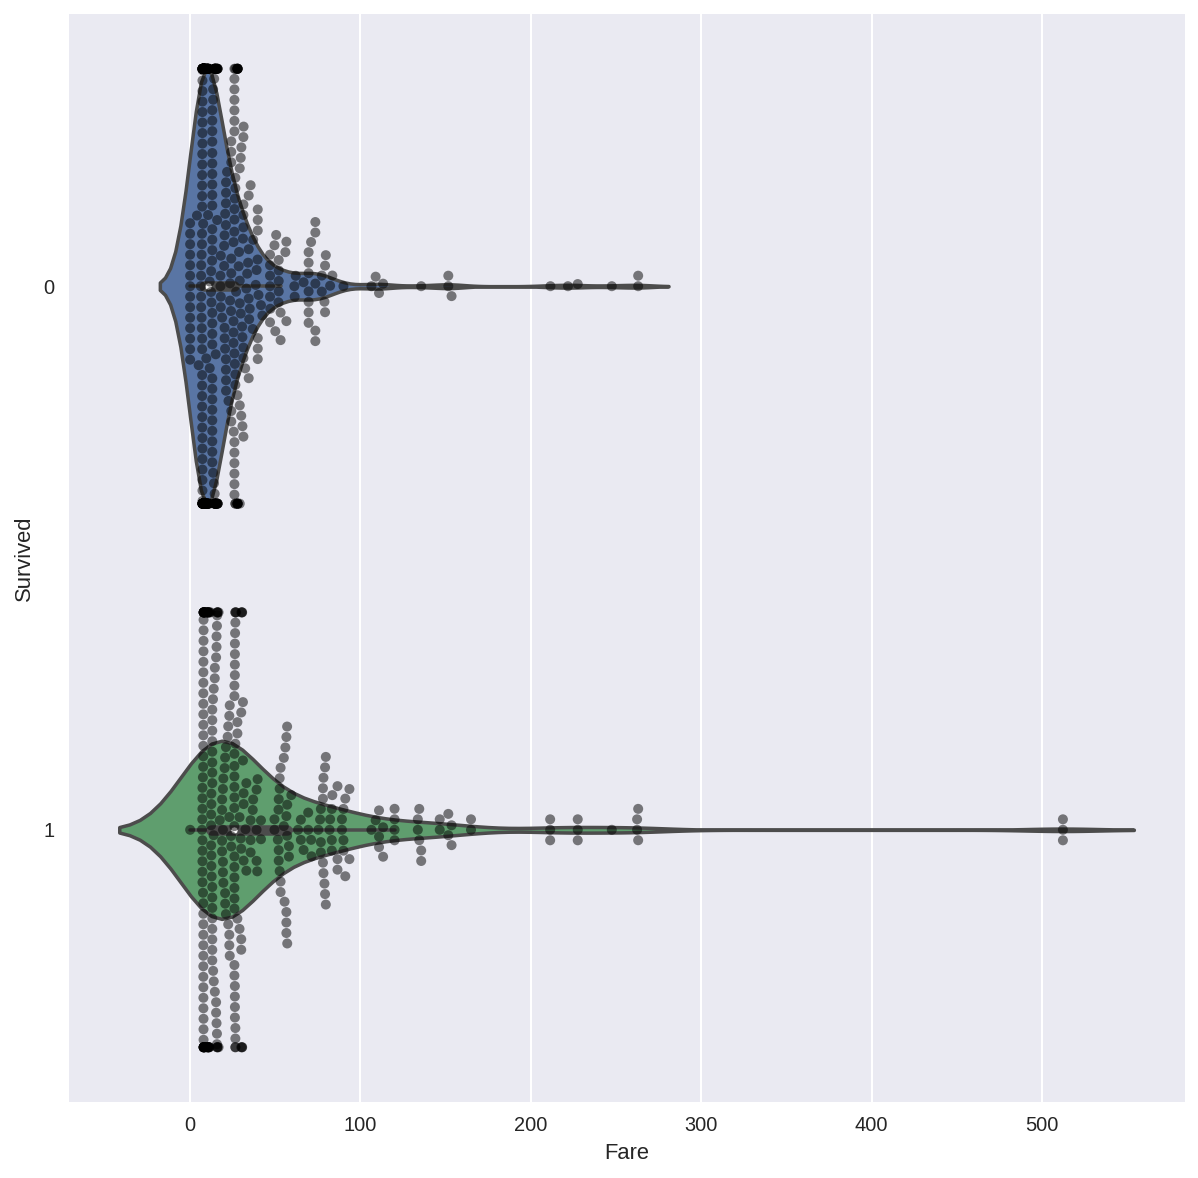

In [59]:
fig=plt.figure(figsize=(10,10))
sns.violinplot(x="Fare", y='Survived', data=titanic, orient='h')
sns.swarmplot(x ="Fare", y='Survived', data=titanic, orient='h', color='k', alpha=0.5)

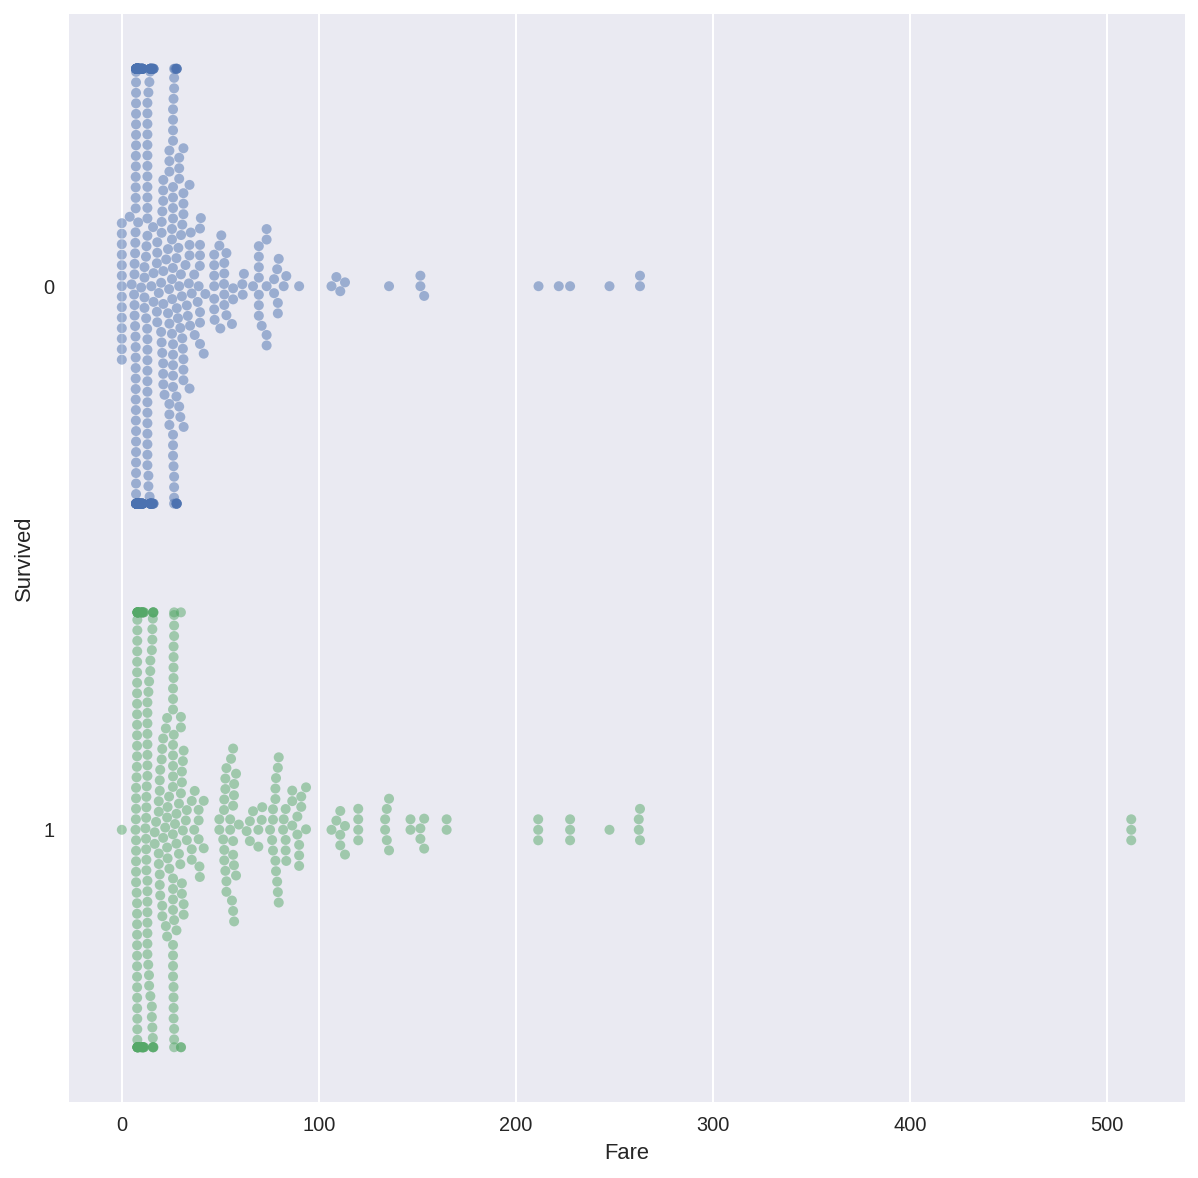

In [61]:
fig=plt.figure(figsize=(10,10))
sns.swarmplot(x ="Fare", y='Survived', data=titanic, orient='h', alpha=0.5)